# Multivariable Linear Model Example

In this notebook, we will fit a multivariable linear regression model to our sample multi-variable data found in class03_multivariable_dataset.csv (which is generated by the class03_partB_multivariable_data_gen.ipynb notebook, so pleae run that notebook first to generate the necessary data for this notebook).

In this example we are not having models compete. Instead, we are fitting one selected model to the data. The model we've selected is what is referred to as a multivariable regression model. 

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('class03_multivariable_dataset.csv')

df.head(10)

,x1,x2,x3,x4,target
0,324.87,4.64,197.90,27.69,-10885.5455
1,-122.35,-75.14,147.76,36.23,1391.7615
2,-105.63,27.78,10.38,59.59,-24327.8205
3,-214.59,-1.34,-22.16,72.98,-29347.3460
4,173.08,-42.89,-305.99,45.85,-63775.3025
5,-460.31,-20.50,221.59,18.97,35517.6935
6,348.96,-20.27,29.18,50.75,-41315.7925
7,-152.24,31.31,130.52,6.05,18060.9225
8,63.81,29.66,200.25,36.41,-1750.4845
9,-49.87,63.02,-57.28,83.70,-46109.1200


Explore the relationships between the variables using partplot from the seaborn library (often referred to as a [correlogram](https://www.python-graph-gallery.com/correlogram/)).

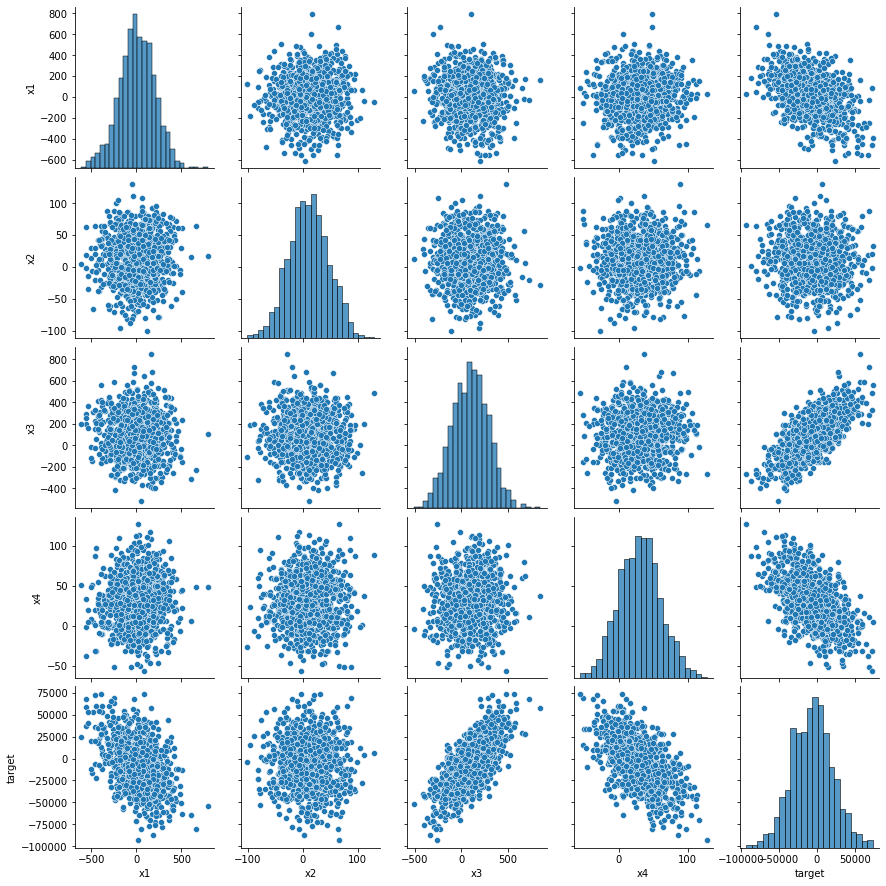

In [3]:
sns.pairplot(df)
plt.show()

## Step 3: Fit multivariable linear regression model to the entire dataset (since we are only testing one model - the multivariable model with all inputs included)

In this notebook, we will incorporate data partitioning. As discussed in last class, data partitioning can help us better identify a model and avoid overfitting the data. 

In this example, we use the sklearn train_test_splot function to partition our data into a training a validation set. The validation data set will be used to guage how well each model performs as a predictive model by testing the model on data that wasn't used in training. 

In [4]:
# partition data
column_list = list(df.columns)
column_list.remove('target')
X = df[column_list] # store our X (input) values in X
y = df['target'] # store our target values in y

Fit this model to all the data...

In [5]:
 multivar_lin_reg=LinearRegression().fit(X,y)

Display resulting model coefficients...

In [6]:
print(f"Y = {multivar_lin_reg.intercept_:.3f} + {multivar_lin_reg.coef_[0]:.3f} x + {multivar_lin_reg.coef_[1]:.6f} x2 + {multivar_lin_reg.coef_[2]:.6f} x3 + {multivar_lin_reg.coef_[3]:.6f} x4")
print(f"coefficient of determination: {multivar_lin_reg.score(X, y):.8f}")

Y = 5.710 + -50.510 x + 10.520023 x2 + 100.499092 x3 + -520.485531 x4
coefficient of determination: 0.99999654


Finally, let's explore the scatter plot diagram with regression lines included...

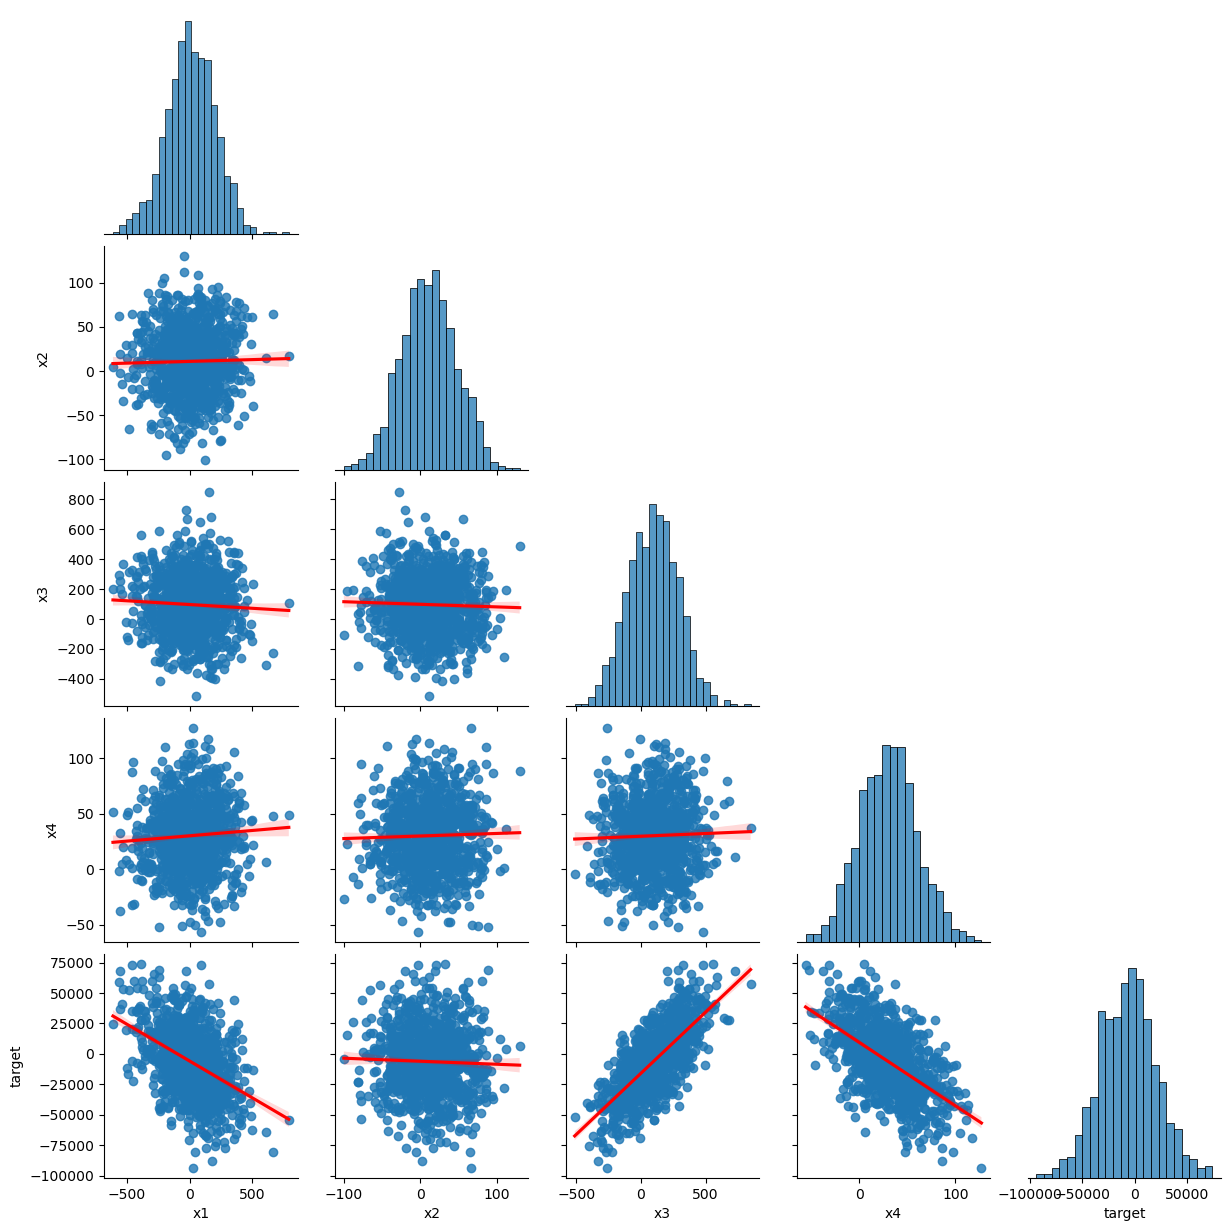

In [7]:
g = sns.pairplot(df, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})

The most important row is the bottom 'target' row. Notice in the bottom row that X1, X3, and X4 seem to have a strong relationship (this is indicated by the steep slope), but X2 has a weaker relationship (due to it's almost flat slope). Also, note that in the set of coefficients of the multivaraiable linear model, X1 has the lowest coefficient, and the others are much higher. The size of the coefficient will generally indicate the strength of the variables effect on the target. 


## Optional Discussion: Using statsmodels linear regression

As discussed in the second class, we only use regression in a machine learning context - as such, we do not dig deeply into regression analysis. Instead, regression is used as a demonstration of a modeling technique that is easy to understand as a 'fitting' method. 

In other classes, you may see regression analysis in much greater depth. Since sklearn is a machine learning library, it lacks some statistical reporting associated with a more stats-oriented exploration of linear regression. 

When you wish to dig deeper into linear regression, I encourage you to look into python's statsmodels package. This package has more traditional statistical measures associated with linear regression analysis. 

NOTE: You will not be expected to know the statsmodels linear regression version. You will only be required to use sklearns linear regression.

In [8]:
import statsmodels.api as sm

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.543e+07
Date:                Mon, 05 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:26:04   Log-Likelihood:                         -5350.0
No. Observations:                1000   AIC:                                  1.071e+04
Df Residuals:                     996   BIC:                                  1.073e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------